In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

In [3]:
# N contiene il numero delle iterazioni

N=30



# K contiene il numero di valori della funzione che si vogliono calcolare (ossia il numero delle variabili)

K=20



# estremo superiore e estremo inferiore delle frequenze considerate nell'integrale

freq_min=1
freq_max=100



# estremo superiore e estremo inferiore delle masse considerate nell'integrale e scarto tra due masse consecutive

m_min=1
m_max=10

dm= (m_max - m_min)/(K-1)


In [4]:

# contiene il valore di partenza delle variabile

var=np.linspace(0, 10, K)



# lista delle masse indagate nella discretizzazione dell'integrale (sono in masse solari)

freq=np.logspace(np.log10(freq_min), np.log10(freq_max), K)



# lista delle masse indagate nella discretizzazione dell'integrale (sono in masse solari)

masse=np.linspace(m_min, m_max, K)




In [5]:
# funzione per il calcolo di omega in funzione della frequenza secondo un certo modello

def funz_omeg(nu):

    n=len(nu)

    return 1*np.ones(n)



# la funzione usata per costruire le matrici

def integ(m_1, m_2, nu):

    z=(m_1*m_2) + nu

    return z



# la funzione che crea le matrici

def fun_mat(nu, K):

    a=np.zeros((K,K))

    for i in range(0, K):
        for j in range(0,K):

            a[i][j]=integ(masse[i], masse[j], nu)

    return a




In [6]:
# omeg contiene i valori di omega per le frequenze analizzate

omeg=funz_omeg(freq)



In [7]:

# La lista matrix è riempita con delle matrici delle forme quadrariche

matrix=[]

for i in range(0, K):

    matrix.append(fun_mat(freq[i], K))





In [8]:

# Tramite le matrici in matrix sono create le funzioni che vanno a comporre il sistema e che sono inserite nella lista funz

funz=[]

for i in range(0,K):

    def f(*var,i=i):
        vec_dx=np.dot(var,matrix[i])
        return np.dot(vec_dx,var)-omeg[i]


    funz.append(f)



In [9]:

# Tali variabile sono introdotte per poter svolgere le derivate delle funzioni

simb=[]

for k in range(0,K):
    simb.append(Symbol('x_{0}'.format(k)))


In [10]:

# Inizializzazione di vari oggetti (F e J contengono rispettivament il valore di ogni funzione del sistema e lo jacobiano calcolati per le soluzioni all'n-esima interazione. var contiene le soluzione all'n-esima interazione

F=np.zeros(K)
J=np.zeros((K,K))



In [12]:

# determinazione dello Jacobiano in forma simbolica

J_simb=[]

for i in range(0,K):

    a=[]

    for j in range(0,K):

        z=funz[i](*simb).diff(simb[j])
        fu=lambdify(simb,z, 'numpy')

        a.append(fu)

    J_simb.append(a)


In [41]:
N=40

# Vettori introdotti per poter fare i grafici finali

graf=[]

for i in range(0,K):

    a=np.zeros(N+1)
    graf.append(a)


In [42]:

var=np.linspace(0, 10, K)

# k è l'indice dell'iterazione
for k in range(0,N):


# riempie i vettori per i grafici
    for i in range(0,K):
        graf[i][k]=var[i]

# applicazione metodo di Newton
    for i in range(0,len(F)):

        F[i]=funz[i](*var)

        for j in range(0,len(J[i])):

            J[j][i]=J_simb[j][i](*var)

    delta=np.linalg.solve(J,F)
    var=var - delta

# inserisce negli array per i grafici i risultati finali ottenuti

for i in range(0,K):
    graf[i][N]=var[i]


In [43]:

# Stampa dei risultati finali

print("\nSoluzioni:\n",var,"\n")


if (K<30):

    print("Funzioni calcolate con i valori delle variabili individuati:")
    for i in range(0,K):
        print("f_{0} =".format(i), funz[i](*var))



Soluzioni:
 [-12583.95118705  38682.41440236 -34577.79040799  26800.19640527
 -32226.90675072  16015.83716512 -21703.0542702    -924.20330662
 -23777.64280155   2612.47872552  55699.91315461  12608.66184954
  -8275.64552114   -553.72893146 -27476.81952411  21527.885562
   5366.86945469  -5979.4764563   -4115.68616189  -7119.35478498] 

Funzioni calcolate con i valori delle variabili individuati:
f_0 = 2.3121945559978485e-05
f_1 = 2.218561712652445e-05
f_2 = 1.2831413187086582e-05
f_3 = 1.304439501836896e-05
f_4 = 6.441102595999837e-05
f_5 = 5.949696060270071e-05
f_6 = 5.498091923072934e-05
f_7 = 6.0889346059411764e-05
f_8 = 7.079163333401084e-05
f_9 = 0.0001269798376597464
f_10 = 0.00010592321632429957
f_11 = 0.0001256165560334921
f_12 = 0.00023736123694106936
f_13 = 0.0002301171189174056
f_14 = 0.0003009647480212152
f_15 = 0.0003661689115688205
f_16 = 0.0005921803531236947
f_17 = 0.0007852381095290184
f_18 = 0.0008992484654299915
f_19 = 0.0012236417387612164


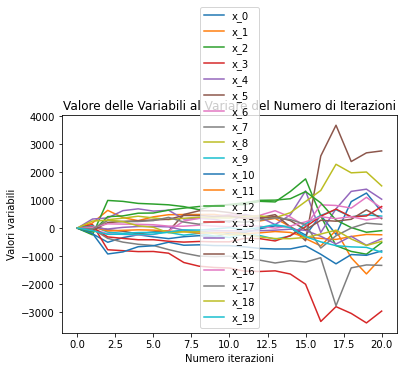

In [40]:
# Grafico degli andamenti delle soluzioni all'aumentare del numero di iterazioni

if (K<30):

    plt.figure()

    plt.title("Valore delle Variabili al Variare del Numero di Iterazioni")
    plt.xlabel("Numero iterazioni")
    plt.ylabel("Valori variabili")

    iter=np.linspace(0,N,N+1)
    for i in range(0,K):
        plt.plot(iter, graf[i], color="C{0}".format(i), label=simb[i], linestyle="-", marker="", markersize=3)

    plt.legend()
    plt.show()


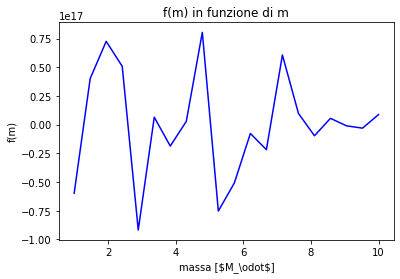

In [24]:

# Grafico della soluzione ottenuta in funzione della massa

plt.figure()

plt.title("f(m) in funzione di m")
plt.xlabel("massa [$M_\odot\$]")
plt.ylabel("f(m)")


plt.plot(masse, var, color="blue", linestyle="-", marker="")

plt.show()

